#### Setup

In [2]:
import model

import torchvision
import torchvision.transforms as transforms

import matplotlib
import matplotlib.pyplot as plt
import matplotlib.ticker as mtick

import numpy as np
import math

%matplotlib inline

#### Load image

In [3]:
batch_size = 8

transform = transforms.Compose(
    [transforms.ToTensor(),
     transforms.Resize((32,32))])

trainset = torchvision.datasets.MNIST(root='./data', train=True,
                                        download=True, transform=transform)
trainloader = torch.utils.data.DataLoader(trainset, batch_size=batch_size)

testset = torchvision.datasets.MNIST(root='./data', train=False,
                                       download=True, transform=transform)
testloader = torch.utils.data.DataLoader(testset, batch_size=batch_size,
                                         shuffle=False)

C:\ProgramData\Anaconda3\lib\site-packages\torchvision\datasets\mnist.py:498: UserWarning: The given NumPy array is not writeable, and PyTorch does not support non-writeable tensors. This means you can write to the underlying (supposedly non-writeable) NumPy array using the tensor. You may want to copy the array to protect its data or make it writeable before converting it to a tensor. This type of warning will be suppressed for the rest of this program. (Triggered internally at  ..\torch\csrc\utils\tensor_numpy.cpp:180.)
  return torch.from_numpy(parsed.astype(m[2], copy=False)).view(*s)


#### Runtime prepare

In [5]:
# Display whether cuda detected
device = torch.device('cuda:0' if torch.cuda.is_available() else 'cpu')
print("device selected:", device)

device selected: cuda:0


#### Augment dataset

In [26]:
# Setup augmented chart
transform_augmented = transforms.Compose(
    [transforms.ToTensor(),
     transforms.Resize((32,32)),
     transforms.RandomVerticalFlip(p=0.5),
     transforms.RandomHorizontalFlip(p=0.5),
     transforms.RandomChoice([transforms.Lambda(lambda x : x + 0.1*torch.randn_like(x)),
          transforms.Lambda(lambda x : x + math.sqrt(0.1)*torch.randn_like(x)),
          transforms.Lambda(lambda x : x + torch.randn_like(x))])])

trainset = torchvision.datasets.MNIST(root='./data', train=True,
                                        download=True, transform=transform_augmented)
trainloader_augmented = torch.utils.data.DataLoader(trainset, batch_size=batch_size)

In [27]:
# Set as cuda / cpu
net_aug = Net().to(device)
net_aug.train_test(trainloader, testloader, batch_size, device, num_epochs = 5)

[1  5000] loss: 1.304
[1 10000] loss: 0.737
[1 15000] loss: 0.578
[2  5000] loss: 0.516
[2 10000] loss: 0.495
[2 15000] loss: 0.445
[3  5000] loss: 0.424
[3 10000] loss: 0.414
[3 15000] loss: 0.392
[4  5000] loss: 0.390
[4 10000] loss: 0.375
[4 15000] loss: 0.349
[5  5000] loss: 0.354
[5 10000] loss: 0.351
[5 15000] loss: 0.329
Finished Training


In [29]:
# Save model to PATH for future reference
PATH = './model_augmented'
torch.save(net_aug, PATH)

#### Verify effect

In [30]:
PATH = './model_augmented'
net_aug = torch.load(PATH, map_location=torch.device(device))
net_aug = net_aug.module.to(device)

horizontal_flip_aug = (getAccuracy(net_aug, testloader_horiflip, batch_size) * 100)
vertical_flip_aug = (getAccuracy(net_aug, testloader_vertiflip, batch_size) * 100)
gaussian_001_aug = (getAccuracy(net_aug, testloader_gaussian_001, batch_size) * 100)
gaussian_01_aug = (getAccuracy(net_aug, testloader_gaussian_01, batch_size) * 100)
gaussian_1_aug = (getAccuracy(net_aug, testloader_gaussian_1, batch_size) * 100)

print('The accuracy for horizontal flip is %.2f%%' % horizontal_flip_aug)
print('The accuracy for Vertical flip is %.2f%%' % vertical_flip_aug)
print('The accuracy for Random Gaussian Noise 0.01 is %.2f%%' % gaussian_001_aug)
print('The accuracy for Random Gaussian Noise 0.1 is %.2f%%' % gaussian_01_aug)
print('The accuracy for Random Gaussian Noise 1 is %.2f%%' % gaussian_1_aug)

The accuracy for horizontal flip is 96.34%
The accuracy for Vertical flip is 95.66%
The accuracy for Random Gaussian Noise 0.01 is 96.01%
The accuracy for Random Gaussian Noise 0.1 is 94.70%
The accuracy for Random Gaussian Noise 1 is 75.81%


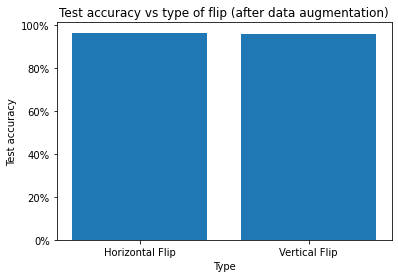

In [31]:
plt.bar(["Horizontal Flip", "Vertical Flip"],[horizontal_flip_aug, vertical_flip_aug])
plt.title('Test accuracy vs type of flip (after data augmentation)')
plt.xlabel('Type')
plt.ylabel('Test accuracy')
plt.gca().yaxis.set_major_formatter(mtick.PercentFormatter())

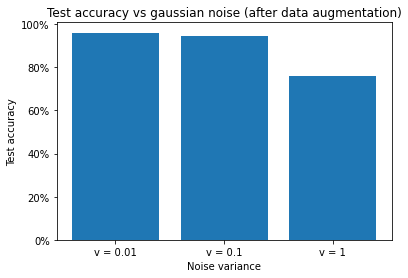

In [32]:
plt.bar(["v = 0.01", "v = 0.1", "v = 1"],[gaussian_001_aug, gaussian_01_aug, gaussian_1_aug])
plt.title('Test accuracy vs gaussian noise (after data augmentation)')
plt.xlabel('Noise variance')
plt.ylabel('Test accuracy')
plt.gca().yaxis.set_major_formatter(mtick.PercentFormatter())